In [169]:
#NAMIT LODH(Intern in sparks Foundation)

#Problem Statement
#predict the optimum number of clusters and represent it visually

In [170]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [171]:
data=pd.read_csv("iris_csv.csv")

In [172]:
data.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [174]:
data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [175]:
data.head(10)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [176]:
data.shape

(150, 5)

In [177]:
data.isnull().sum()
#no null data

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [178]:
data.nunique()

sepallength    35
sepalwidth     23
petallength    43
petalwidth     22
class           3
dtype: int64

In [179]:
data.duplicated().sum()
#no duplicate data

3

In [180]:
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

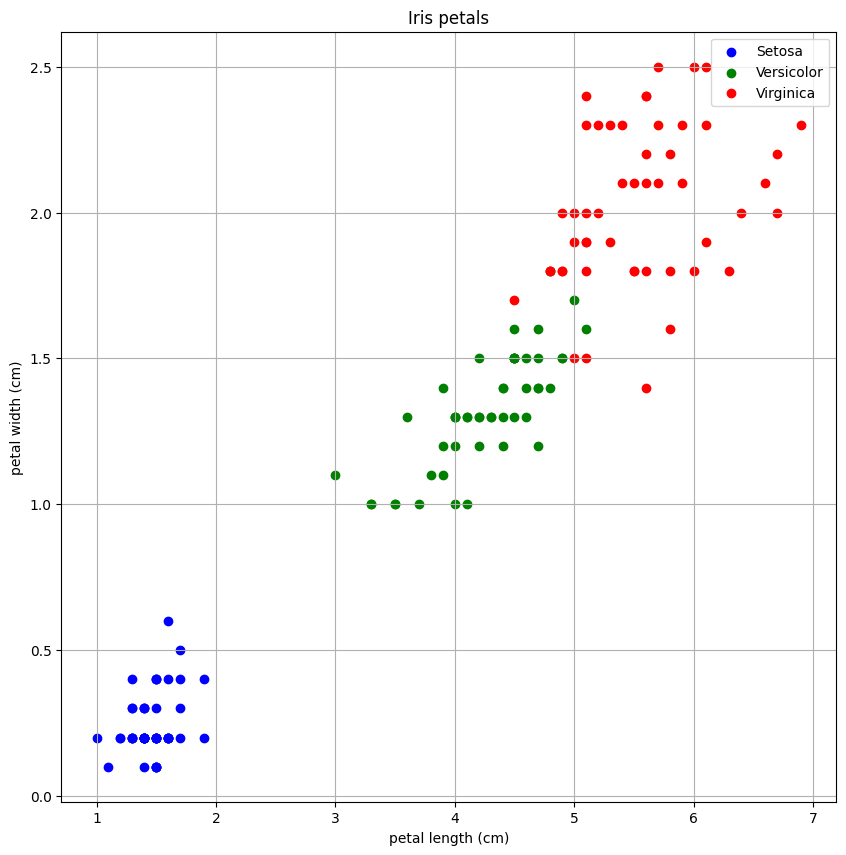

In [181]:
setosa = data[data['class'] == "Iris-setosa"]
versicolor = data[data['class'] =='Iris-versicolor']
virginica = data[data['class'] =='Iris-virginica']
# filtered_data = data[data['Column_Name'] == desired_value]
fig, ax = plt.subplots()
fig.set_size_inches(10,10) 

# lables and scatter points
ax.scatter(setosa['petallength'], setosa['petalwidth'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petallength'], versicolor['petalwidth'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petallength'], virginica['petalwidth'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

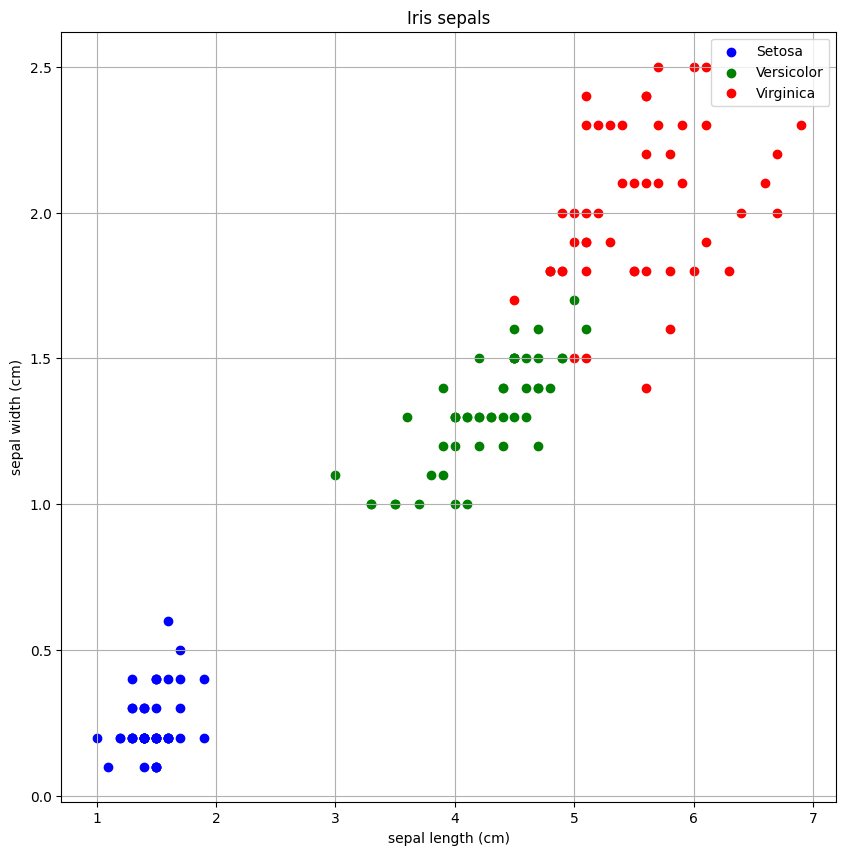

In [182]:
setosa = data[data['class'] == "Iris-setosa"]
versicolor = data[data['class'] =='Iris-versicolor']
virginica = data[data['class'] =='Iris-virginica']

fig, ax = plt.subplots()
fig.set_size_inches(10,10) 

# lables and scatter points
ax.scatter(setosa['petallength'], setosa['petalwidth'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petallength'], versicolor['petalwidth'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petallength'], virginica['petalwidth'], label="Virginica", facecolor="red")


ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris sepals")
ax.legend()

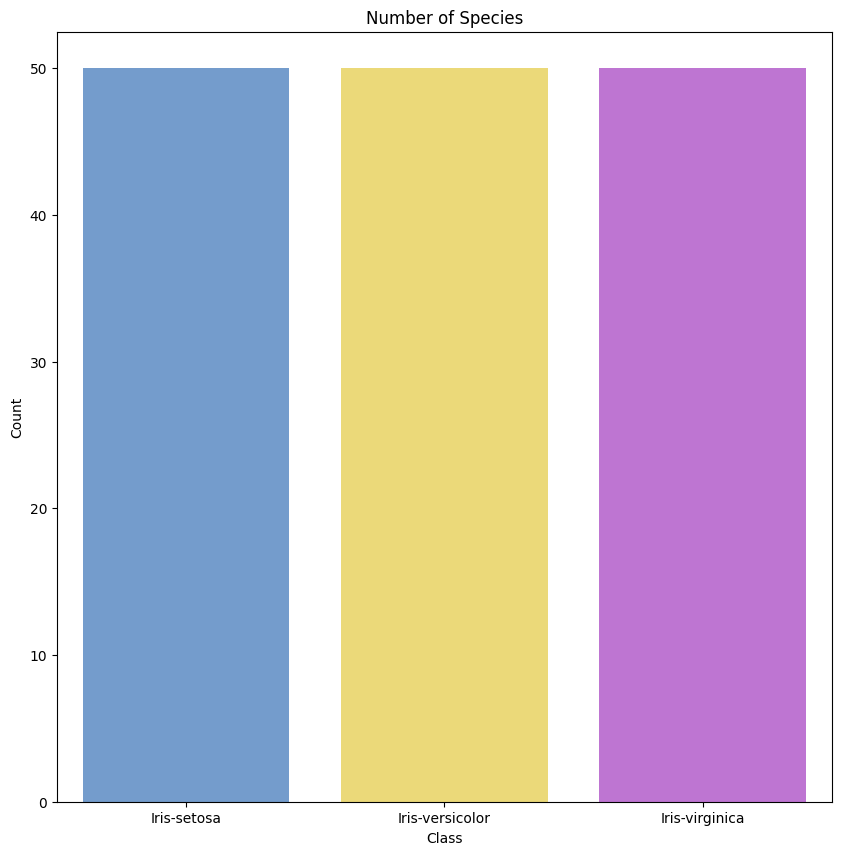

In [183]:
count = data['class'].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x=count.index, y=count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=10)
plt.xlabel('Class', fontsize=10)
plt.title('Number of Species')
plt.show()

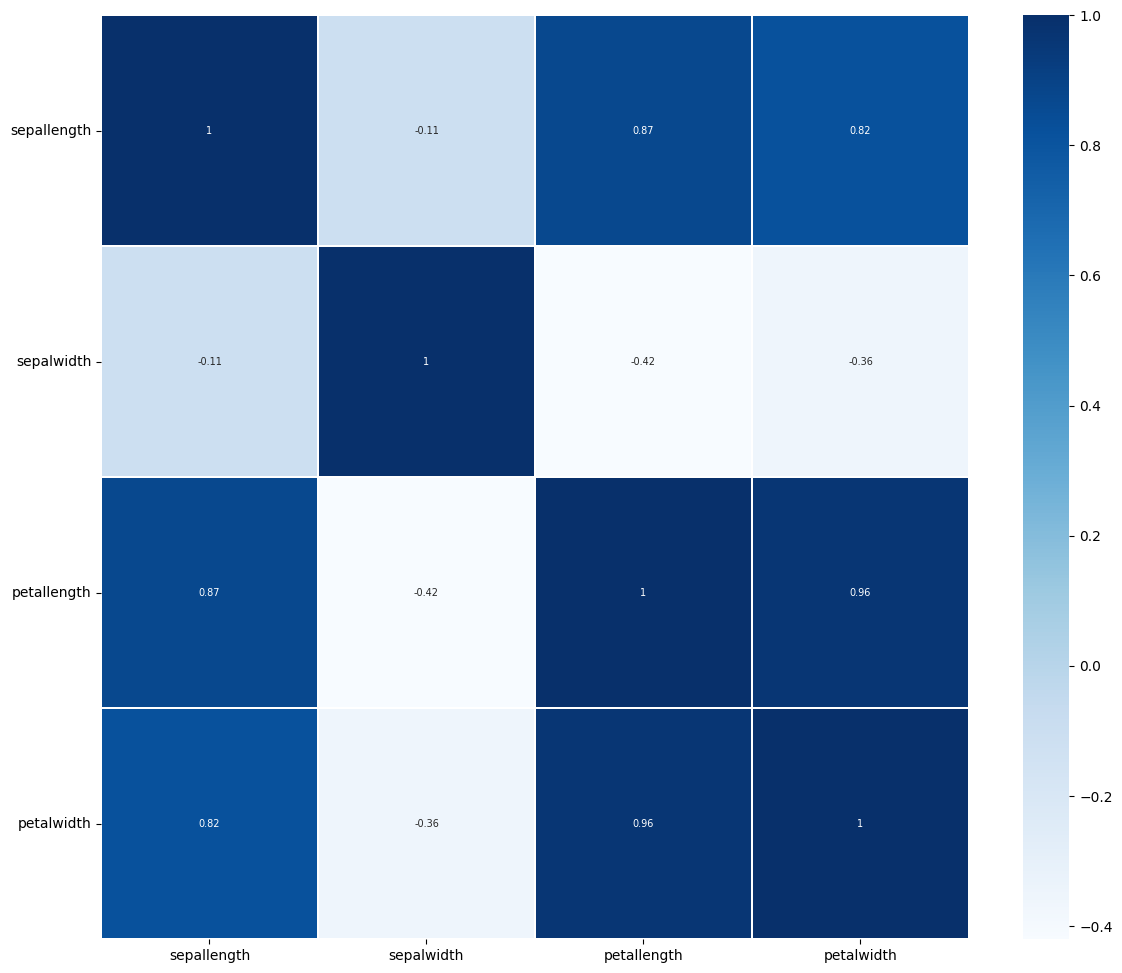

In [184]:
plt.figure(figsize=(14,12))
column_to_drop = 'class'
data = data.drop(column_to_drop, axis=1)
sns.heatmap(data.corr(),linewidths=0.1,cmap="Blues", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

In [185]:
from sklearn.model_selection import train_test_split

y_column_index=3
X=data.iloc[:,:4]
y=data.iloc[:,y_column_index]

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [186]:
X_train.shape

(105, 4)

In [187]:
X_test.shape

(45, 4)

In [188]:
y_test.shape

(45,)

In [189]:
y_train.shape

(105,)

In [190]:
from sklearn.linear_model import LogisticRegression

l= LogisticRegression()
y_train_multiclass = y_train.copy()
y_test_multiclass = y_test.copy()
num_bins = 3  # Specify the number of bins
labels = [f'Class_{i}' for i in range(num_bins)]  # Specify the class labels

# Perform binning or thresholding on y_train
train_bins = pd.cut(y_train, bins=num_bins, labels=labels)

# Assign the bin labels to y_train_multiclass
y_train_multiclass = train_bins

# Perform binning or thresholding on y_test
test_bins = pd.cut(y_test, bins=num_bins, labels=labels)

# Assign the bin labels to y_test_multiclass
y_test_multiclass = test_bins
l.fit(X_train,y_train_multiclass)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [191]:
training_prediction = l.predict(X_train)
training_prediction

array(['Class_1', 'Class_2', 'Class_2', 'Class_1', 'Class_2', 'Class_1',
       'Class_2', 'Class_1', 'Class_1', 'Class_2', 'Class_1', 'Class_1',
       'Class_2', 'Class_1', 'Class_2', 'Class_1', 'Class_0', 'Class_2',
       'Class_1', 'Class_1', 'Class_1', 'Class_1', 'Class_2', 'Class_0',
       'Class_0', 'Class_2', 'Class_1', 'Class_0', 'Class_0', 'Class_1',
       'Class_0', 'Class_2', 'Class_1', 'Class_0', 'Class_1', 'Class_2',
       'Class_1', 'Class_0', 'Class_2', 'Class_2', 'Class_2', 'Class_2',
       'Class_0', 'Class_0', 'Class_2', 'Class_2', 'Class_0', 'Class_2',
       'Class_0', 'Class_2', 'Class_2', 'Class_0', 'Class_0', 'Class_2',
       'Class_0', 'Class_0', 'Class_0', 'Class_1', 'Class_2', 'Class_2',
       'Class_0', 'Class_0', 'Class_0', 'Class_1', 'Class_1', 'Class_0',
       'Class_0', 'Class_1', 'Class_0', 'Class_2', 'Class_1', 'Class_2',
       'Class_1', 'Class_0', 'Class_2', 'Class_0', 'Class_2', 'Class_0',
       'Class_0', 'Class_2', 'Class_0', 'Class_2', 

In [192]:
test_prediction=l.predict(X_test)
test_prediction

array(['Class_2', 'Class_1', 'Class_0', 'Class_2', 'Class_0', 'Class_2',
       'Class_0', 'Class_1', 'Class_1', 'Class_1', 'Class_2', 'Class_1',
       'Class_1', 'Class_1', 'Class_1', 'Class_0', 'Class_1', 'Class_1',
       'Class_0', 'Class_0', 'Class_2', 'Class_1', 'Class_0', 'Class_0',
       'Class_1', 'Class_0', 'Class_0', 'Class_1', 'Class_1', 'Class_0',
       'Class_2', 'Class_1', 'Class_0', 'Class_2', 'Class_2', 'Class_1',
       'Class_0', 'Class_1', 'Class_1', 'Class_1', 'Class_2', 'Class_0',
       'Class_2', 'Class_0', 'Class_0'], dtype=object)

In [199]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# bin_edges = [0, 1, 2, 3]  # Adjust the bin edges based on your data

# Apply binning to convert continuous variables into categorical variables
test_prediction_numeric = label_encoder.fit_transform(test_prediction)
y_test_numeric = label_encoder.transform(y_test)

# Calculate the accuracy score
accuracy_score = metrics.accuracy_score(y_test_numeric, test_prediction_numeric)

print("Accuracy score %.3f" % accuracy_score)

ValueError: y contains previously unseen labels: 2.4

In [ ]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, training_prediction))

Precision, Recall, Confusion matrix, in training

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        34
Iris-versicolor      1.000     0.938     0.968        32
 Iris-virginica      0.951     1.000     0.975        39

       accuracy                          0.981       105
      macro avg      0.984     0.979     0.981       105
   weighted avg      0.982     0.981     0.981       105

[[34  0  0]
 [ 0 30  2]
 [ 0  0 39]]


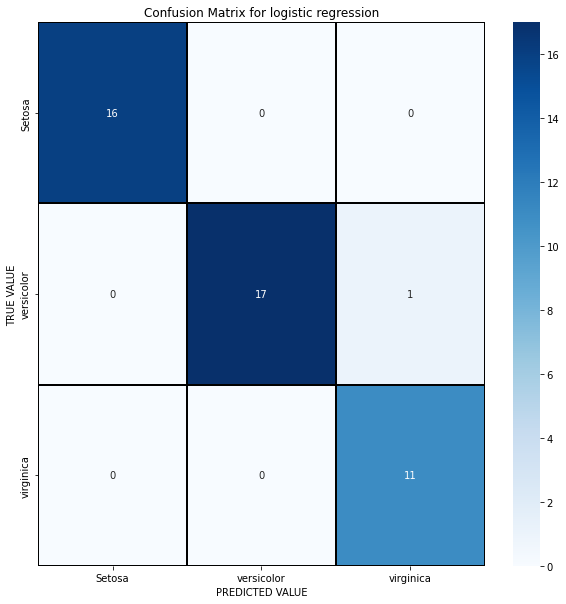

In [ ]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test, test_prediction)

x_axis_labels = ["Setosa", "versicolor","virginica"]
y_axis_labels = ["Setosa", "versicolor","virginica"]

f,ax=plt.subplots(figsize =(10,10))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black",  fmt = ".0f", ax=ax,cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUE")
plt.ylabel("TRUE VALUE")
plt.title('Confusion Matrix for logistic regression')
plt.show()